In [1]:
##Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Read csv file
df = pd.read_csv('Resources/random_sample_2.csv')
df[['SR Create TS', 'SR Close TS', 'Cust Contact TS', 'CQ Applied TS']] = df[['SR Create TS', 'SR Close TS', 'Cust Contact TS', 'CQ Applied TS']].astype('datetime64[ns]')
df

,OCPM #,Geo,Region,Country,Country ISO Code,Make/Miss,CROSS #,RCMS #,RETAIN #,Salesforce #,...,F2B,F7,FTP,ea,9d,Agent Id,PREM IND,GA IND,VATS Ind,CQ Applied TS
0,409RLFB,NaN,NaN,UNITED STATES,US,Make,0,0,0,0,...,0,0,0,0,0,C-PYF2US,Non-Premier Account,0,Y,2019-12-30 15:43:00
1,409PZJB,NaN,NaN,UNITED STATES,US,Make,BQJJ8KY,0,0,0,...,0,0,0,12/17/2019 2:56,12/18/2019 12:59,WEB,Non-Premier Account,0,N,2019-12-17 04:03:00
2,409R8PY,NaN,NaN,UNITED STATES,US,Miss,0,0,0,0,...,0,0,0,0,12/30/2019 12:28,C-PYF4US,Non-Premier Account,0,Y,2019-12-26 08:35:00
3,409SY8W,NaN,NaN,UNITED STATES,US,Make,BQJDF9P,0,0,0,...,0,0,0,1/9/2020 9:09,1/10/2020 10:19,WEB,Non-Premier Account,0,N,2020-01-09 09:47:00
4,409RLNN,NaN,NaN,UNITED STATES,US,Make,0,0,0,0,...,0,0,0,0,0,C-RATPUS,Non-Premier Account,0,Y,2019-12-30 16:11:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,409PLCP,NaN,NaN,UNITED STATES,US,Miss,0,0,0,0,...,0,0,0,0,12/16/2019 9:40,C-RAUWUS,Non-Premier Account,0,Y,2019-12-13 11:29:00
374,409Q4KB,NaN,NaN,UNITED STATES,US,Miss,409Q4KB,0,0,0,...,0,0,0,12/17/2019 9:10,0,WEB,Non-Premier Account,0,N,2019-12-17 09:16:00
375,409QHRJ,NaN,NaN,UNITED STATES,US,Miss,BQJHHCP,0,0,0,...,0,0,0,12/19/2019 12:36,12/23/2019 14:43,WEB,Non-Premier Account,0,N,2019-12-19 12:39:00
376,409R2F9,NaN,NaN,UNITED STATES,US,Miss,409R2F9,0,0,0,...,0,0,0,0,0,C-N1FXUS,Non-Premier Account,0,N,2019-12-23 08:08:00


In [3]:
#Create new data with columns we're interested in
new_df = df[['OCPM #', 'Make/Miss', 'SR Create TS', 'SR Close TS', 'CQ Applied TS']]
new_df

,OCPM #,Make/Miss,SR Create TS,SR Close TS,CQ Applied TS
0,409RLFB,Make,2019-12-30 15:12:00,2020-01-03 21:13:00,2019-12-30 15:43:00
1,409PZJB,Make,2019-12-16 15:31:00,2019-12-18 16:00:00,2019-12-17 04:03:00
2,409R8PY,Miss,2019-12-26 08:19:00,2020-01-02 18:25:00,2019-12-26 08:35:00
3,409SY8W,Make,2020-01-08 15:17:00,2020-01-13 13:56:00,2020-01-09 09:47:00
4,409RLNN,Make,2019-12-30 16:07:00,2019-12-30 16:11:00,2019-12-30 16:11:00
...,...,...,...,...,...
373,409PLCP,Miss,2019-12-13 11:14:00,2019-12-19 21:34:00,2019-12-13 11:29:00
374,409Q4KB,Miss,2019-12-17 09:00:00,2019-12-31 11:40:00,2019-12-17 09:16:00
375,409QHRJ,Miss,2019-12-18 15:02:00,2019-12-26 17:47:00,2019-12-19 12:39:00
376,409R2F9,Miss,2019-12-23 07:58:00,2020-01-09 09:53:00,2019-12-23 08:08:00


In [4]:
#Add column to hold difference between SR Close TS and SR Create TS
new_df['Close and Create Diff'] = (new_df.loc[:, 'SR Close TS'] - new_df.loc[:, 'SR Create TS'])

#Add column to hold difference between CQ Applied TS and SR Create TS
new_df['CQ and Create Diff'] = (new_df.loc[:, 'CQ Applied TS'] - new_df.loc[:, 'SR Create TS'])
new_df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,OCPM #,Make/Miss,SR Create TS,SR Close TS,CQ Applied TS,Close and Create Diff,CQ and Create Diff
0,409RLFB,Make,2019-12-30 15:12:00,2020-01-03 21:13:00,2019-12-30 15:43:00,4 days 06:01:00,00:31:00
1,409PZJB,Make,2019-12-16 15:31:00,2019-12-18 16:00:00,2019-12-17 04:03:00,2 days 00:29:00,12:32:00
2,409R8PY,Miss,2019-12-26 08:19:00,2020-01-02 18:25:00,2019-12-26 08:35:00,7 days 10:06:00,00:16:00
3,409SY8W,Make,2020-01-08 15:17:00,2020-01-13 13:56:00,2020-01-09 09:47:00,4 days 22:39:00,18:30:00
4,409RLNN,Make,2019-12-30 16:07:00,2019-12-30 16:11:00,2019-12-30 16:11:00,0 days 00:04:00,00:04:00
...,...,...,...,...,...,...,...
373,409PLCP,Miss,2019-12-13 11:14:00,2019-12-19 21:34:00,2019-12-13 11:29:00,6 days 10:20:00,00:15:00
374,409Q4KB,Miss,2019-12-17 09:00:00,2019-12-31 11:40:00,2019-12-17 09:16:00,14 days 02:40:00,00:16:00
375,409QHRJ,Miss,2019-12-18 15:02:00,2019-12-26 17:47:00,2019-12-19 12:39:00,8 days 02:45:00,21:37:00
376,409R2F9,Miss,2019-12-23 07:58:00,2020-01-09 09:53:00,2019-12-23 08:08:00,17 days 01:55:00,00:10:00


In [5]:
#Descriptive statistics for SR and CQ differences
summary = pd.DataFrame({
    'CX and RC': new_df['Close and Create Diff'].describe(),
    'CQ and RC': new_df['CQ and Create Diff'].describe()
})
summary

,CX and RC,CQ and RC
count,378,378
mean,11 days 00:34:07.301587,0 days 11:26:51.111111
std,9 days 09:44:23.927416,1 days 10:08:49.117689
min,0 days 00:03:00,0 days 00:02:00
25%,4 days 00:35:15,0 days 00:09:00
50%,7 days 03:00:30,0 days 00:35:00
75%,16 days 04:22:15,0 days 11:22:00
max,43 days 00:26:00,19 days 18:37:00


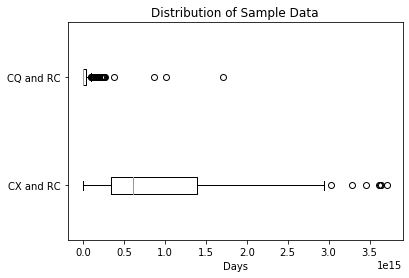

In [6]:
#Create box plots to visualize data
fig, ax = plt.subplots()
ax.set_title('Distribution of Sample Data')
ax.set_xlabel('Days')
ax.boxplot([new_df['Close and Create Diff'], new_df['CQ and Create Diff']], labels = ['CX and RC', 'CQ and RC'], vert = False)
#ax.boxplot(new_df['CQ and Create Diff'], labels = ['CQ and RC'], vert = False)
#ax.boxplot([new_df['Close and Create Diff']], labels = ['CX and RC'], vert = False)
plt.show()

In [10]:
cx_rc_diff = 11 + ((0*60*60) + (34*60) + (7.30))/((24*60*60))
cq_rc_diff = 0 + ((11*60*60) + (26*60) + (51.11))/((24*60*60))
print(f'Sample KPI (CX and RC Difference): {round(cx_rc_diff, 2)} ±5.00%')
print(f'Sample KPI (CQ and RC Difference): {round(cq_rc_diff, 2)} ±5.00%')

Sample KPI (CX and RC Difference): 11.02 ±5.00%
Sample KPI (CQ and RC Difference): 0.48 ±5.00%


In [8]:
#Quartiles CX and RC
q1 = 4 + ((0 * 60 * 60) + (35 * 60) + (0))/((24*60*60))
q2 = 7 + ((3 * 60 * 60) + (00 * 60) + (30))/((24*60*60))
q3 = 18 + ((3 * 60 * 60) + (25 * 60) + (30))/((24*60*60))
print(f'CX and RC Quartiles')
print(f'Q1: {round(q1,2)}')
print(f'Q2: {round(q2,2)}')
print(f'Q3: {round(q3,2)}')

CX and RC Quartiles
Q1: 4.16
Q2: 8.11
Q3: 18.16


In [13]:
#Quartiles CQ and RC
q1 = 0 + ((0 * 60 * 60) + (9 * 60) + (0))/((24*60*60))
q2 = 0 + ((0 * 60 * 60) + (35 * 60) + (0))/((24*60*60))
q3 = 0 + ((11 * 60 * 60) + (22 * 60) + (0))/((24*60*60))
print(f'CQ and RC Quartiles')
print(f'Q1: {round(q1,2)}')
print(f'Q2: {round(q2,2)}')
print(f'Q3: {round(q3,2)}')

CQ and RC Quartiles
Q1: 0.01
Q2: 0.02
Q3: 0.47
